In [2]:
import tensorflow as tf

from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [11]:
BATCH_SIZE = 32
IMAGE_SIZE = 256

In [12]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(r"./../Dataset" , shuffle= True , image_size=(IMAGE_SIZE,IMAGE_SIZE) , batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [28]:
class_names = dataset.class_names

In [14]:
len(dataset)

68

In [16]:
len(dataset) * BATCH_SIZE
# Approx around total images provided in the dataset

2176

In [17]:
for image_batch , label_batch in dataset.take(1) :
    print(image_batch.shape)
    print(label_batch.shape)

(32, 256, 256, 3)
(32,)


2023-02-20 23:34:43.504154: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [18]:
CHANNELS = 3

In [20]:
# Tensor of one image
image_batch[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[163., 160., 167.],
        [177., 174., 181.],
        [156., 153., 160.],
        ...,
        [191., 190., 196.],
        [190., 189., 195.],
        [190., 189., 195.]],

       [[143., 140., 147.],
        [147., 144., 151.],
        [141., 138., 145.],
        ...,
        [195., 194., 200.],
        [196., 195., 201.],
        [197., 196., 202.]],

       [[179., 176., 183.],
        [184., 181., 188.],
        [168., 165., 172.],
        ...,
        [194., 193., 199.],
        [192., 191., 197.],
        [191., 190., 196.]],

       ...,

       [[152., 150., 163.],
        [160., 158., 171.],
        [131., 129., 142.],
        ...,
        [153., 151., 165.],
        [145., 143., 157.],
        [161., 159., 173.]],

       [[178., 176., 189.],
        [168., 166., 179.],
        [157., 155., 168.],
        ...,
        [158., 156., 170.],
        [151., 149., 163.],
        [161., 159., 173.]],

       [[149., 14

In [21]:
image_batch[0].shape

TensorShape([256, 256, 3])

(-0.5, 255.5, 255.5, -0.5)

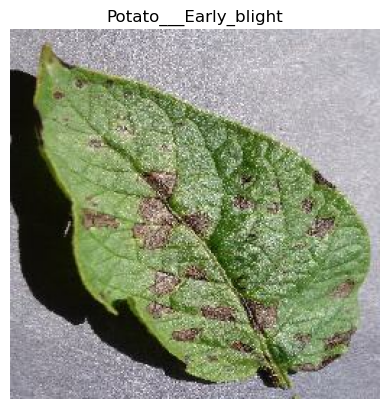

In [32]:
plt.imshow(image_batch[0].numpy().astype('uint8'))
plt.title(class_names[label_batch[0]])
plt.axis("off")

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

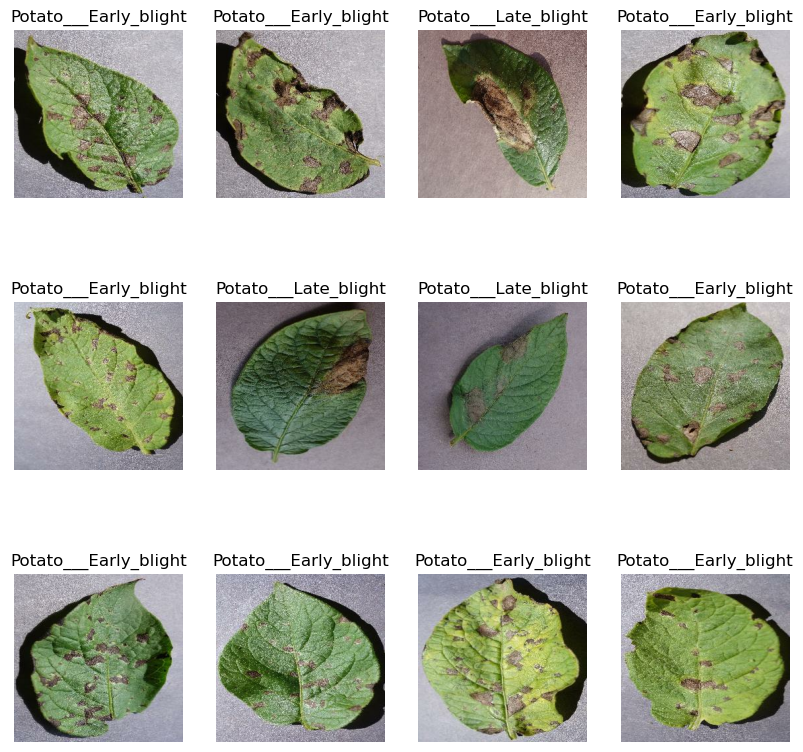

In [34]:
plt.figure(figsize=(10,10))
for i in range(12) :
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [35]:
len(dataset)

68

In [ ]:
EPOCHS = 50

In [46]:
# TRAINING = 80 , TESTING = 10 , VALIDATION = 10 

TRAINING_SIZE = 0.8
VALIDATION_SIZE = 0.1
TESTING_SIZE = 0.1


In [39]:
len(dataset) * TRAINING_SIZE

54.400000000000006

In [42]:
train_ds = dataset.take(54)
len(train_ds)

54

In [43]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [44]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [49]:
def get_dataset_partitions(ds , train_split = TRAINING_SIZE , test_split = TESTING_SIZE , val_split = VALIDATION_SIZE , shuffle = True , shuffle_size = 10000) :
    
    ds_size = len(ds)

    if shuffle : 
        ds = ds.shuffle(shuffle_size,seed = 17)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds , test_ds , val_ds

In [50]:
len(dataset)

68

In [52]:
train_ds , test_ds , val_ds = get_dataset_partitions(dataset , 0.8 , 0.1 , 0.1 , True , 10000)

In [56]:
train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [57]:
val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [58]:

from tensorflow.keras import Sequential

In [68]:
resize_and_rescale = Sequential( [
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)]
    )


In [69]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])